In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
df = pd.read_csv("AAPL.csv")

In [ ]:
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098578,48630400
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.103376,37363200
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.107739,46950400
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.113409,48003200
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.123877,55574400


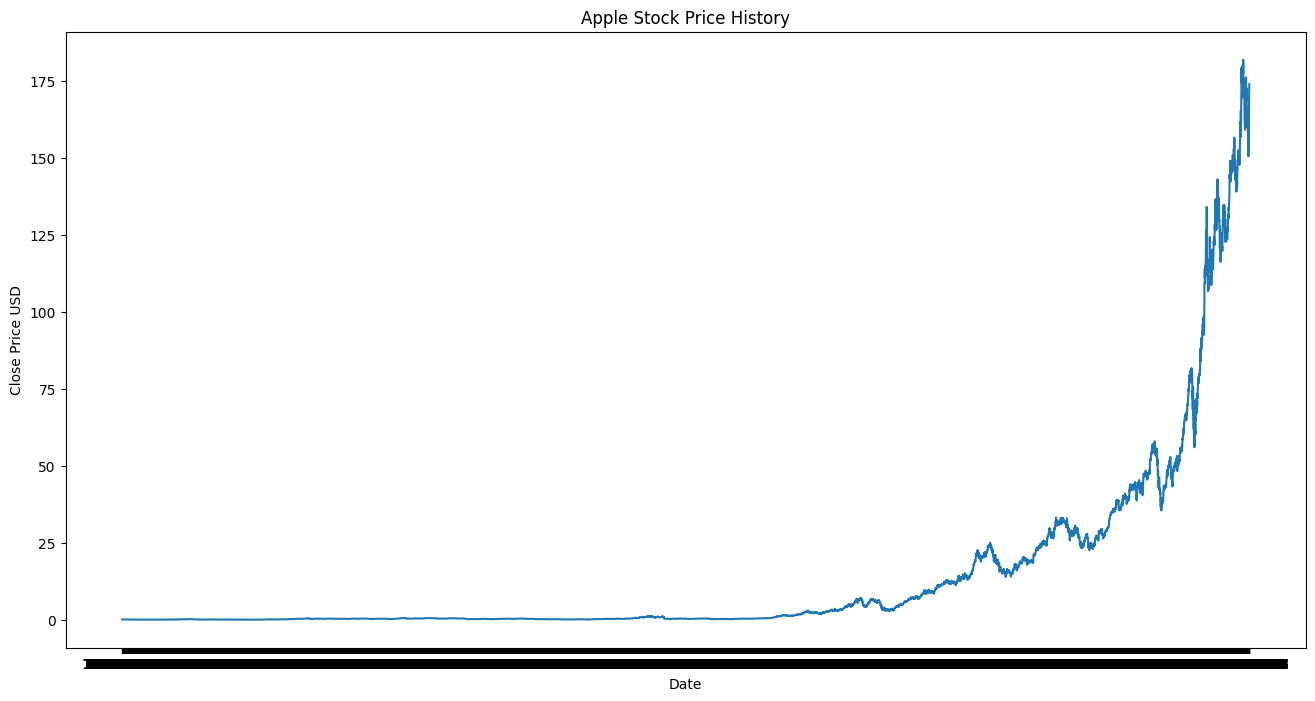

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Apple Stock Price History')
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.show()

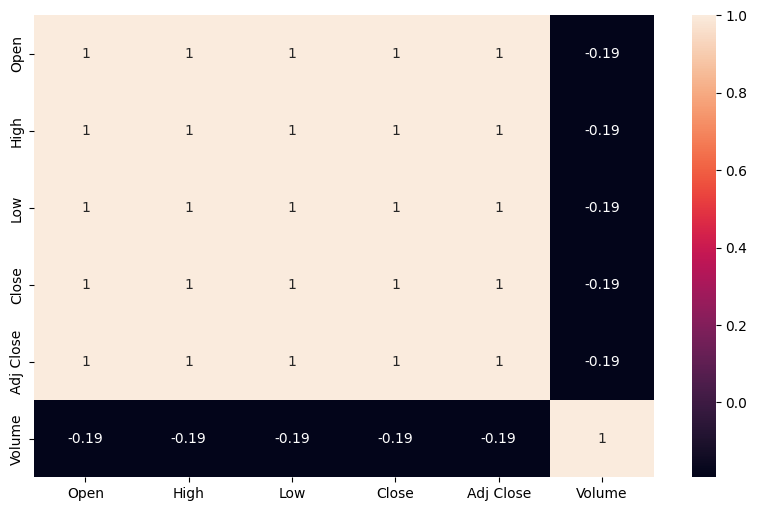

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.drop(['Date'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
data = df.filter(['Close']).values

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
training_data_len = int(np.ceil(len(data) * 0.8))

In [ ]:
train_data = scaled_data[0:training_data_len, :]

In [ ]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train

array([[0.00043548, 0.00039868, 0.00034961, ..., 0.00035881, 0.00030975,
        0.00028214],
       [0.00039868, 0.00034961, 0.00036495, ..., 0.00030975, 0.00028214,
        0.00026068],
       [0.00034961, 0.00036495, 0.00038335, ..., 0.00028214, 0.00026068,
        0.00028214],
       ...,
       [0.09243058, 0.09147079, 0.09603026, ..., 0.11073318, 0.10991078,
        0.10974984],
       [0.09147079, 0.09603026, 0.09572799, ..., 0.10991078, 0.10974984,
        0.1085506 ],
       [0.09603026, 0.09572799, 0.09424219, ..., 0.10974984, 0.1085506 ,
        0.10915316]])

In [ ]:
y_train

array([0.00026068, 0.00028214, 0.00027601, ..., 0.1085506 , 0.10915316,
       0.10866052])

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(8268, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit(x_train, y_train, batch_size=3, epochs=5)

Epoch 1/5
2756/2756 [==============================] - 111s 39ms/step - loss: 1.4172e-05
Epoch 2/5
2756/2756 [==============================] - 109s 40ms/step - loss: 5.9649e-06
Epoch 3/5
2756/2756 [==============================] - 97s 35ms/step - loss: 5.3909e-06
Epoch 4/5
2756/2756 [==============================] - 93s 34ms/step - loss: 2.3712e-06
Epoch 5/5
2756/2756 [==============================] - 92s 33ms/step - loss: 3.7533e-06


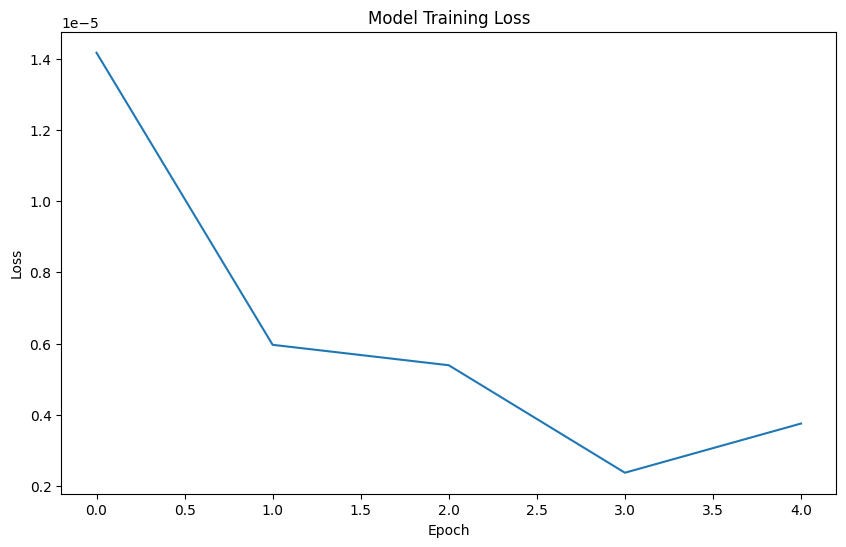

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = data[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
test_data

array([[0.09572799],
       [0.09424219],
       [0.09516272],
       ...,
       [0.92751196],
       [0.93515096],
       [0.95636431]])

In [ ]:
x_test = np.array(x_test)
x_test

array([[0.09572799, 0.09424219, 0.09516272, ..., 0.1085506 , 0.10915316,
        0.10866052],
       [0.09424219, 0.09516272, 0.09448165, ..., 0.10915316, 0.10866052,
        0.10783224],
       [0.09516272, 0.09448165, 0.09330401, ..., 0.10866052, 0.10783224,
        0.10659375],
       ...,
       [0.96850974, 0.99076729, 0.98505172, ..., 0.88244727, 0.90091278,
        0.90860679],
       [0.99076729, 0.98505172, 0.9855464 , ..., 0.90091278, 0.90860679,
        0.92751196],
       [0.98505172, 0.9855464 , 0.97906145, ..., 0.90860679, 0.92751196,
        0.93515096]])

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
x_test.shape

(2081, 60, 1)

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

66/66 [==============================] - 2s 17ms/step


In [ ]:
predictions

array([[ 20.735672],
       [ 20.654165],
       [ 20.497503],
       ...,
       [154.21008 ],
       [156.39084 ],
       [157.94255 ]], dtype=float32)

<ipython-input-27-90a31ed26323>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


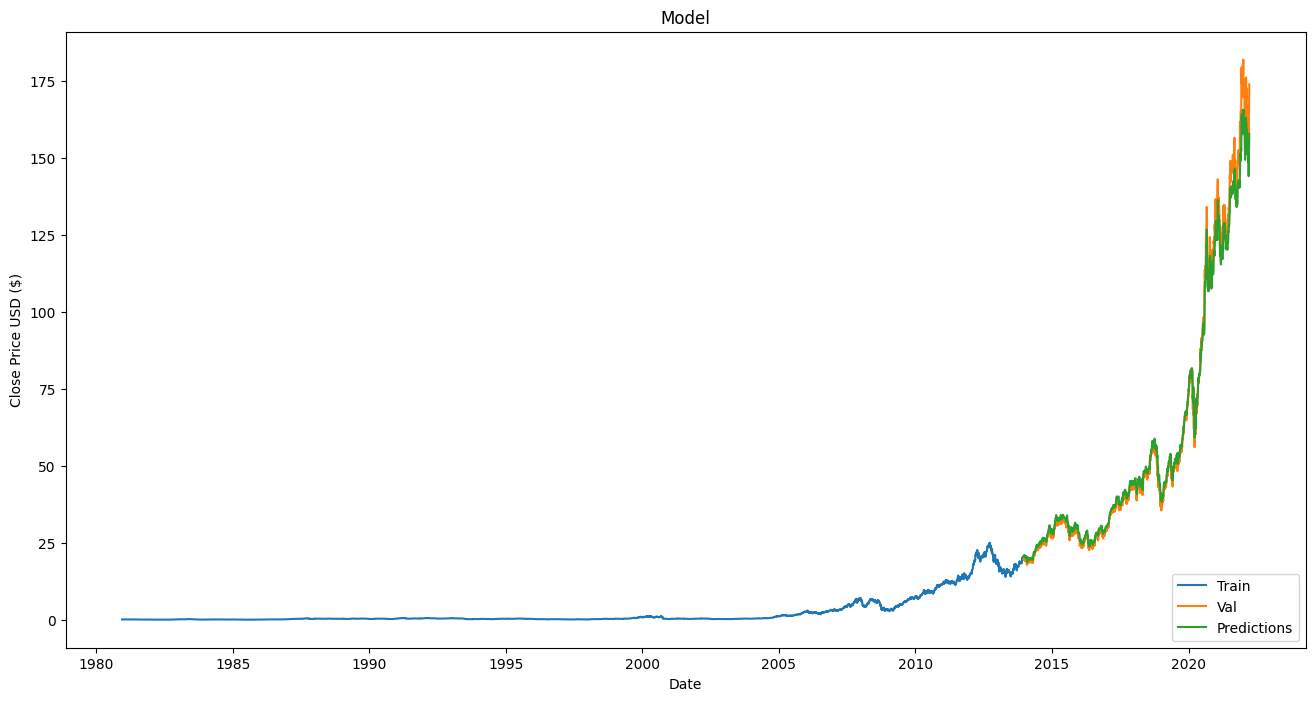

In [ ]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Date'], train['Close'])
plt.plot(valid['Date'], valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Predictions
8328,2013-12-18,19.632143,19.694643,19.242857,19.670357,17.419680,565863200,20.735672
8329,2013-12-19,19.625000,19.642857,19.418928,19.445000,17.220104,320308800,20.654165
8330,2013-12-20,19.479643,19.700357,19.457857,19.607857,17.364323,436413600,20.497503
8331,2013-12-23,20.285713,20.382856,20.098572,20.360357,18.030731,501306400,20.485502
8332,2013-12-24,20.353214,20.424286,20.215357,20.273930,17.954189,167554800,20.870598
8333,2013-12-26,20.289286,20.339287,20.120714,20.139286,17.834953,204008000,21.096390
8334,2013-12-27,20.136429,20.157499,19.982143,20.003214,17.714447,225884400,21.117800
8335,2013-12-30,19.909286,20.003214,19.725714,19.804285,17.538282,253629600,21.018932
8336,2013-12-31,19.791786,20.045713,19.785713,20.036428,17.743862,223084400,20.843334
8337,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.494324,234684800,20.849522


In [ ]:
valid.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Predictions
10399,2022-03-11,158.929993,159.279999,154.500000,154.729996,154.729996,96836300,149.577179
10400,2022-03-14,151.449997,154.119995,150.100006,150.619995,150.619995,108732100,147.339493
10401,2022-03-15,150.899994,155.570007,150.380005,155.089996,155.089996,92964300,144.174316
10402,2022-03-16,157.050003,160.000000,154.460007,159.589996,159.589996,102300200,144.617279
10403,2022-03-17,158.610001,161.000000,157.630005,160.619995,160.619995,75615400,147.486389
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200,149.805542
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400,152.397858
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000,154.210083
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700,156.390839
10408,2022-03-24,171.059998,174.139999,170.210007,174.070007,174.070007,90018700,157.942551
